**Импортируем библиотеки**
==========================

In [71]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

**Предварительная обработка данных**
====================================

In [72]:
class suicides(object):
    def __init__(self):
        self.df = suicides.df
        self.df_test = suicides.df_test
        self.df_all_feature_var_names = []
        self.df_test_all_feature_var_names = []
        
    _non_numerical_feature_names = []
    _numerical_feature_names = []
    _is_one_hot_encoder = 0
    _feature_names_num = []
    _is_not_import_data = 0
    
    
    df = pd.read_csv('Train.csv')
    df_test = pd.read_csv('Test.csv')
    
    
    def extract_numerical_features(df):
        df = df.copy()
        numerical_features = pd.Series(data=False, index=df.columns, dtype=bool)
        
        for feature in df.columns:
            if any(tuple(df[feature].map(lambda x: type(x)) == int)) or \
                any(tuple(df[feature].map(lambda x: type(x)) == float)) & \
                    (not any(tuple(df[feature].map(lambda x: type(x)) == str))):
                numerical_features[feature] = 1
    
        return numerical_features[numerical_features == 1].index

    def extract_non_numerical_features(df):
        df = df.copy()
        return df.select_dtypes(exclude=[np.number])
 
    def encode_labels_in_numeric_format(df, estimated_var):         
        feature_names_num = ''.join([estimated_var, '_количество'])
        mask = ~df[estimated_var].isnull()
        df[feature_names_num] = df[estimated_var]
        df.loc[mask, tuple([feature_names_num])] = df[estimated_var].factorize()[0][mask[mask==1].index]
    def label_classes(df, estimated_var):
        
        le = LabelEncoder()
        le.fit(df[estimated_var].values)
        
        return le.classes_
    
    def one_hot_encoder(df, estimated_var):  
        df_class = df.copy()
        ohe = OneHotEncoder()
        label_classes = df_class[estimated_var].factorize()[1]
        new_one_hot_encoded_features = [''.join([estimated_var, '_', x]) for x in label_classes]
        mask = ~df[estimated_var].isnull()
        feature_var_values = ohe.fit_transform(np.reshape(np.array(df[''.join([estimated_var, '_количество'])][mask].values), 
                                                      (df[mask].shape[0], 1))).toarray().astype(int)

        for ite in new_one_hot_encoded_features:
            df[ite] = df[estimated_var]
        df.loc[mask, tuple(new_one_hot_encoded_features)] = feature_var_values

In [73]:
train = suicides().df
test = suicides().df_test

In [74]:
#список категориальных признаков
categorical_feature = ['пол','возраст','регион']

In [75]:
train.head()

,страна,год,пол,возраст,количество_самоубийств,население,самоубийства_на_100к_человек,ИЧР_за_год,ВВП_за_год,ВВП_на_душу_населения,индекс_безработицы,регион
0,Албания,1987,мужской,15-24 лет,21,312900,6.71,0.673,2.156625e+09,796,5.2,Европа
1,Албания,1987,мужской,35-54 лет,16,308000,5.19,0.673,2.156625e+09,796,5.2,Европа
2,Албания,1987,женский,15-24 лет,14,289700,4.83,0.673,2.156625e+09,796,5.2,Европа
3,Албания,1987,мужской,75+ лет,1,21800,4.59,0.673,2.156625e+09,796,5.2,Европа
4,Албания,1987,мужской,25-34 лет,9,274300,3.28,0.673,2.156625e+09,796,5.2,Европа


In [76]:
suicides.encode_labels_in_numeric_format(train, categorical_feature[0])
suicides.encode_labels_in_numeric_format(train, categorical_feature[1])
suicides.encode_labels_in_numeric_format(train, categorical_feature[2])

suicides.encode_labels_in_numeric_format(test, categorical_feature[0])
suicides.encode_labels_in_numeric_format(test, categorical_feature[1])
suicides.encode_labels_in_numeric_format(test, categorical_feature[2])

train.head()

,страна,год,пол,возраст,количество_самоубийств,население,самоубийства_на_100к_человек,ИЧР_за_год,ВВП_за_год,ВВП_на_душу_населения,индекс_безработицы,регион,пол_количество,возраст_количество,регион_количество
0,Албания,1987,мужской,15-24 лет,21,312900,6.71,0.673,2.156625e+09,796,5.2,Европа,0,0,0
1,Албания,1987,мужской,35-54 лет,16,308000,5.19,0.673,2.156625e+09,796,5.2,Европа,0,1,0
2,Албания,1987,женский,15-24 лет,14,289700,4.83,0.673,2.156625e+09,796,5.2,Европа,1,0,0
3,Албания,1987,мужской,75+ лет,1,21800,4.59,0.673,2.156625e+09,796,5.2,Европа,0,2,0
4,Албания,1987,мужской,25-34 лет,9,274300,3.28,0.673,2.156625e+09,796,5.2,Европа,0,3,0


In [77]:
suicides.one_hot_encoder(train, categorical_feature[0])
suicides.one_hot_encoder(train, categorical_feature[1])
suicides.one_hot_encoder(train, categorical_feature[2])
#suicides.one_hot_encoder(train, categorical_feature[3])



suicides.one_hot_encoder(test, categorical_feature[0])
suicides.one_hot_encoder(test, categorical_feature[1])
suicides.one_hot_encoder(test, categorical_feature[2])
#suicides.one_hot_encoder(test, categorical_feature[3])
train.head()

,страна,год,пол,возраст,количество_самоубийств,население,самоубийства_на_100к_человек,ИЧР_за_год,ВВП_за_год,ВВП_на_душу_населения,...,возраст_75+ лет,возраст_25-34 лет,возраст_55-74 лет,возраст_5-14 лет,регион_Европа,регион_Южная Америка,регион_Островные государства,регион_Азия,регион_Ближний Восток,регион_Северная Америка
0,Албания,1987,мужской,15-24 лет,21,312900,6.71,0.673,2.156625e+09,796,...,0,0,0,0,1,0,0,0,0,0
1,Албания,1987,мужской,35-54 лет,16,308000,5.19,0.673,2.156625e+09,796,...,0,0,0,0,1,0,0,0,0,0
2,Албания,1987,женский,15-24 лет,14,289700,4.83,0.673,2.156625e+09,796,...,0,0,0,0,1,0,0,0,0,0
3,Албания,1987,мужской,75+ лет,1,21800,4.59,0.673,2.156625e+09,796,...,1,0,0,0,1,0,0,0,0,0
4,Албания,1987,мужской,25-34 лет,9,274300,3.28,0.673,2.156625e+09,796,...,0,1,0,0,1,0,0,0,0,0


In [78]:
train.columns

Index(['страна', 'год', 'пол', 'возраст', 'количество_самоубийств',
       'население', 'самоубийства_на_100к_человек', 'ИЧР_за_год', 'ВВП_за_год',
       'ВВП_на_душу_населения', 'индекс_безработицы', 'регион',
       'пол_количество', 'возраст_количество', 'регион_количество',
       'пол_мужской', 'пол_женский', 'возраст_15-24 лет', 'возраст_35-54 лет',
       'возраст_75+ лет', 'возраст_25-34 лет', 'возраст_55-74 лет',
       'возраст_5-14 лет', 'регион_Европа', 'регион_Южная Америка',
       'регион_Островные государства', 'регион_Азия', 'регион_Ближний Восток',
       'регион_Северная Америка'],
      dtype='object')

In [79]:
train = train.drop(categorical_feature[0], axis=1)
train = train.drop(categorical_feature[1], axis=1)
train = train.drop(categorical_feature[2], axis=1)
"""Удаляем категориальные признаки"""
test = test.drop(categorical_feature[0], axis=1)
test = test.drop(categorical_feature[1], axis=1)
test = test.drop(categorical_feature[2], axis=1)
train.head()

,страна,год,количество_самоубийств,население,самоубийства_на_100к_человек,ИЧР_за_год,ВВП_за_год,ВВП_на_душу_населения,индекс_безработицы,пол_количество,...,возраст_75+ лет,возраст_25-34 лет,возраст_55-74 лет,возраст_5-14 лет,регион_Европа,регион_Южная Америка,регион_Островные государства,регион_Азия,регион_Ближний Восток,регион_Северная Америка
0,Албания,1987,21,312900,6.71,0.673,2.156625e+09,796,5.2,0,...,0,0,0,0,1,0,0,0,0,0
1,Албания,1987,16,308000,5.19,0.673,2.156625e+09,796,5.2,0,...,0,0,0,0,1,0,0,0,0,0
2,Албания,1987,14,289700,4.83,0.673,2.156625e+09,796,5.2,1,...,0,0,0,0,1,0,0,0,0,0
3,Албания,1987,1,21800,4.59,0.673,2.156625e+09,796,5.2,0,...,1,0,0,0,1,0,0,0,0,0
4,Албания,1987,9,274300,3.28,0.673,2.156625e+09,796,5.2,0,...,0,1,0,0,1,0,0,0,0,0


In [80]:
columns_to_convert = ['пол_мужской', 'пол_женский', 'возраст_15-24 лет', 'возраст_35-54 лет', 'возраст_75+ лет', 'возраст_25-34 лет', 'возраст_55-74 лет', 'возраст_5-14 лет', 'регион_Европа', 'регион_Южная Америка', 'регион_Островные государства', 'регион_Азия', 'регион_Ближний Восток', 'регион_Северная Америка']

train[columns_to_convert] = train[columns_to_convert].astype(int)
test[columns_to_convert] = test[columns_to_convert].astype(int)

In [81]:
train = train[train['год']> 2008]

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   страна                        778 non-null    object 
 1   год                           778 non-null    int64  
 2   количество_самоубийств        778 non-null    int64  
 3   население                     778 non-null    int64  
 4   самоубийства_на_100к_человек  778 non-null    float64
 5   ИЧР_за_год                    778 non-null    float64
 6   ВВП_за_год                    778 non-null    float64
 7   ВВП_на_душу_населения         778 non-null    int64  
 8   индекс_безработицы            778 non-null    float64
 9   пол_количество                778 non-null    int64  
 10  возраст_количество            778 non-null    int64  
 11  регион_количество             778 non-null    int64  
 12  пол_мужской                   778 non-null    int32  
 13  пол_ж

**Предварительная обработка**
============================

In [83]:
test = test.drop(['самоубийства_на_100к_человек'], axis=1)
train = train.drop(['самоубийства_на_100к_человек'], axis=1)


train['Самоубийства_на_100к_человек'] = train['количество_самоубийств'] / train['население'] * 100000
 

features_drop_train = ['количество_самоубийств','пол_количество','возраст_количество','регион_количество']
features_drop_test = ['пол_количество','возраст_количество','регион_количество']

test = test.drop(features_drop_test, axis=1)
train = train.drop(features_drop_train, axis=1)

In [84]:
""" список con будет содержать подвыборку из тренировочного набора данных, 
относящуюся к определенной стране из тестового набора данных"""
con = []
for i in test.страна.unique():
    con.append(train[train.страна == i])

In [85]:
""" объединили все подвыборки из списка con 
теперь train содержит объединенный тренировочный набор данных, 
который содержит все строки из исходного тренировочного набора данных, 
относящиеся к уникальным странам в тестовом наборе данных."""
train = pd.concat(con, axis=0)

In [86]:
train.head()

,страна,год,население,ИЧР_за_год,ВВП_за_год,ВВП_на_душу_населения,индекс_безработицы,пол_мужской,пол_женский,возраст_15-24 лет,...,возраст_25-34 лет,возраст_55-74 лет,возраст_5-14 лет,регион_Европа,регион_Южная Америка,регион_Островные государства,регион_Азия,регион_Ближний Восток,регион_Северная Америка,Самоубийства_на_100к_человек
552,Аргентина,2009,653486,0.7796,3.329765e+11,8961,8.7,1,0,0,...,0,0,0,0,1,0,0,0,0,27.085508
553,Аргентина,2009,3436265,0.7796,3.329765e+11,8961,8.7,1,0,1,...,0,0,0,0,1,0,0,0,0,17.722731
554,Аргентина,2009,2683502,0.7796,3.329765e+11,8961,8.7,1,0,0,...,0,1,0,0,1,0,0,0,0,16.172896
555,Аргентина,2009,3210244,0.7796,3.329765e+11,8961,8.7,1,0,0,...,1,0,0,0,1,0,0,0,0,15.699741
556,Аргентина,2009,4566645,0.7796,3.329765e+11,8961,8.7,1,0,0,...,0,0,0,0,1,0,0,0,0,11.868669


In [87]:
test.head()

,страна,год,количество_самоубийств,население,ИЧР_за_год,ВВП_за_год,ВВП_на_душу_населения,индекс_безработицы,пол_мужской,пол_женский,...,возраст_55-74 лет,возраст_25-34 лет,возраст_35-54 лет,возраст_5-14 лет,регион_Южная Америка,регион_Европа,регион_Азия,регион_Северная Америка,регион_Ближний Восток,регион_Островные государства
0,Аргентина,2015,245,712691,0.7796,5.947493e+11,14981,6.5,1,0,...,0,0,0,0,1,0,0,0,0,0
1,Аргентина,2015,656,3500580,0.7796,5.947493e+11,14981,6.5,1,0,...,0,0,0,0,1,0,0,0,0,0
2,Аргентина,2015,431,3011963,0.7796,5.947493e+11,14981,6.5,1,0,...,1,0,0,0,1,0,0,0,0,0
3,Аргентина,2015,465,3289927,0.7796,5.947493e+11,14981,6.5,1,0,...,0,1,0,0,1,0,0,0,0,0
4,Аргентина,2015,633,5166179,0.7796,5.947493e+11,14981,6.5,1,0,...,0,0,1,0,1,0,0,0,0,0


In [88]:
train.isna().sum()

страна                          0
год                             0
население                       0
ИЧР_за_год                      0
ВВП_за_год                      0
ВВП_на_душу_населения           0
индекс_безработицы              0
пол_мужской                     0
пол_женский                     0
возраст_15-24 лет               0
возраст_35-54 лет               0
возраст_75+ лет                 0
возраст_25-34 лет               0
возраст_55-74 лет               0
возраст_5-14 лет                0
регион_Европа                   0
регион_Южная Америка            0
регион_Островные государства    0
регион_Азия                     0
регион_Ближний Восток           0
регион_Северная Америка         0
Самоубийства_на_100к_человек    0
dtype: int64

In [89]:
test.isna().sum()

страна                          0
год                             0
количество_самоубийств          0
население                       0
ИЧР_за_год                      0
ВВП_за_год                      0
ВВП_на_душу_населения           0
индекс_безработицы              0
пол_мужской                     0
пол_женский                     0
возраст_75+ лет                 0
возраст_15-24 лет               0
возраст_55-74 лет               0
возраст_25-34 лет               0
возраст_35-54 лет               0
возраст_5-14 лет                0
регион_Южная Америка            0
регион_Европа                   0
регион_Азия                     0
регион_Северная Америка         0
регион_Ближний Восток           0
регион_Островные государства    0
dtype: int64

In [90]:
train_test_data=[train,test]
""" "ВВП_на_душу_населения" и "ВВП_за_год" в тренировочном и тестовом наборах 
данных будут нормализованы с использованием функции normalize, 
что поможет привести их значения к общему масштабу. 
Результат можно увидеть с помощью команды test.head(), 
которая выводит первые строки тестового набора данных после 
выполнения нормализации."""
def normalize(X):
    return np.abs((X-np.mean(X))/np.std(X))
for dataset in train_test_data:
    dataset['ВВП_на_душу_населения']=normalize(dataset['ВВП_на_душу_населения'])
    dataset['ВВП_за_год']=normalize(dataset['ВВП_за_год'])
test.head()

,страна,год,количество_самоубийств,население,ИЧР_за_год,ВВП_за_год,ВВП_на_душу_населения,индекс_безработицы,пол_мужской,пол_женский,...,возраст_55-74 лет,возраст_25-34 лет,возраст_35-54 лет,возраст_5-14 лет,регион_Южная Америка,регион_Европа,регион_Азия,регион_Северная Америка,регион_Ближний Восток,регион_Островные государства
0,Аргентина,2015,245,712691,0.7796,0.073233,0.52564,6.5,1,0,...,0,0,0,0,1,0,0,0,0,0
1,Аргентина,2015,656,3500580,0.7796,0.073233,0.52564,6.5,1,0,...,0,0,0,0,1,0,0,0,0,0
2,Аргентина,2015,431,3011963,0.7796,0.073233,0.52564,6.5,1,0,...,1,0,0,0,1,0,0,0,0,0
3,Аргентина,2015,465,3289927,0.7796,0.073233,0.52564,6.5,1,0,...,0,1,0,0,1,0,0,0,0,0
4,Аргентина,2015,633,5166179,0.7796,0.073233,0.52564,6.5,1,0,...,0,0,1,0,1,0,0,0,0,0


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet, ElasticNetCV
from pandas import Series, DataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor  

df_predict = pd.DataFrame()

for i in train['страна'].unique():
    train_by_country = train[train['страна'] == i]
    y = train_by_country['Самоубийства_на_100к_человек']
    X = train_by_country.drop(['Самоубийства_на_100к_человек', 'страна', 'население'], axis=1) 
    
    # Определение значений параметров, которые вы хотите перебрать
    param_grid = {
        'model__learning_rate': [0.1, 0.2, 0.4],
        'model__reg_lambda': [0.3, 0.5, 0.7],
        'model__subsample': [0.8, 0.9, 1.0]
    }
    
    # Создание пайплайна для моделирования
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', XGBRegressor())
    ])
    
    # Создание объекта GridSearchCV с указанными параметрами
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    
    # Подгонка модели с использованием GridSearchCV
    grid_search.fit(X, y)
    
    # Лучшая модель с оптимальными значениями параметров
    best_model = grid_search.best_estimator_
    
    # Прогнозирование для тестового набора данных
    test_by_country = test[test['страна'] == i]
    test_by_country['поколение_поколение G.I.'] = 0
    test_by_country_2 = test_by_country.drop(['население', 'страна'], axis=1)
    test_by_country_2 = test_by_country_2.reindex(columns=X.columns)
    predictions = best_model.predict(test_by_country_2)
    
    # Сохранение результатов прогнозирования
    test_by_country['прогноз'] = predictions
    test_by_country['прогноз_количество_суицидов'] = predictions / 100000 * test_by_country['население']
    test_result = test_by_country.loc[:, ['страна', 'год', 'прогноз', 'население', 'прогноз_количество_суицидов']]
    df_predict = df_predict.append(test_result)
    
    print("Текущие значения параметров модели:")
    print("Learning Rate:", best_model.named_steps['model'].get_params()['learning_rate'])
    print("Reg Lambda:", best_model.named_steps['model'].get_params()['reg_lambda'])
    print("Subsample:", best_model.named_steps['model'].get_params()['subsample'])
    
    merge_data1 = df_predict['прогноз_количество_суицидов'].groupby(df_predict['страна']).sum()
    merge_data2 =pd.DataFrame({'страна':merge_data1.index, 'прогноз_количество_суицидов':merge_data1.values})
    merge_data2.to_csv('result1.csv')
    answer = pd.read_csv('grouped_suicides_2015.csv', delimiter=',')
    answer.columns = ['страна', 'количество_самоубийства']
    merge_answer= pd.merge(merge_data2, answer , on ='страна', how='left')
    merge_answer['ошибка']=abs(merge_answer['количество_самоубийства']-merge_answer['прогноз_количество_суицидов'])
    merge_answer1=merge_answer.sort_values('страна',ascending=True)
    merge_answer1.to_csv('result2.csv')
    true_value = merge_answer1.количество_самоубийства
    prediction_value = merge_answer1.прогноз_количество_суицидов
    print('RMSE = ', np.sqrt(mean_squared_error(prediction_value, true_value)))
    print('MAE =', mean_absolute_error(prediction_value,true_value))
    print('MAE =', np.log(mean_absolute_error(prediction_value,true_value)))
    
df_predict

Текущие значения параметров модели:
Learning Rate: 0.4
Reg Lambda: 0.5
Subsample: 0.9
RMSE =  0.012120483692342532
MAE = 0.012120483692342532
MAE = -4.412858390528176
Текущие значения параметров модели:
Learning Rate: 0.1
Reg Lambda: 0.7
Subsample: 0.8
RMSE =  31.72749180052918
MAE = 22.440784025521154
MAE = 3.1108800187928662
Текущие значения параметров модели:
Learning Rate: 0.4
Reg Lambda: 0.7
Subsample: 0.8
RMSE =  60.795112080560834
MAE = 46.71455914933444
MAE = 3.8440558751744764
Текущие значения параметров модели:
Learning Rate: 0.4
Reg Lambda: 0.5
Subsample: 1.0
RMSE =  727.7906170290122
MAE = 397.9777700749643
MAE = 5.9863961496415365
Текущие значения параметров модели:
Learning Rate: 0.4
Reg Lambda: 0.5
Subsample: 0.9
RMSE =  651.1468992972859
MAE = 325.4382585214864
MAE = 5.785172761695086
Текущие значения параметров модели:
Learning Rate: 0.1
Reg Lambda: 0.3
Subsample: 0.9
RMSE =  594.4132911104108
MAE = 271.40548205766214
MAE = 5.603613946377543
Текущие значения параметров

Текущие значения параметров модели:
Learning Rate: 0.2
Reg Lambda: 0.3
Subsample: 0.9
RMSE =  712.50762985645
MAE = 391.6387393125653
MAE = 5.970339831485095
Текущие значения параметров модели:
Learning Rate: 0.1
Reg Lambda: 0.7
Subsample: 0.8
RMSE =  705.9495946730493
MAE = 385.7398387886091
MAE = 5.955163149453967


,страна,год,прогноз,население,прогноз_количество_суицидов
0,Аргентина,2015,24.083218,712691,171.638924
1,Аргентина,2015,20.190777,3500580,706.794295
2,Аргентина,2015,13.682824,3011963,412.121600
3,Аргентина,2015,15.300298,3289927,503.368626
4,Аргентина,2015,12.189175,5166179,629.714581
...,...,...,...,...,...
773,Уругвай,2015,8.233904,232133,19.113608
774,Уругвай,2015,9.495818,440475,41.826705
775,Уругвай,2015,6.623784,255067,16.895086
776,Уругвай,2015,0.719365,252509,1.816462


In [99]:
print("Лучшие значения параметров модели:")
print("Learning Rate:", best_model.named_steps['model'].get_params()['learning_rate'])
print("Reg Lambda:", best_model.named_steps['model'].get_params()['reg_lambda'])
print("Subsample:", best_model.named_steps['model'].get_params()['subsample'])

Лучшие значения параметров модели:
Learning Rate: 0.1
Reg Lambda: 0.7
Subsample: 0.8


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet, ElasticNetCV
from pandas import Series, DataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor  


df_predict = DataFrame()
 
for i in train['страна'].unique():
  
    train_by_country = train[train['страна']==i]
  
    y = train_by_country['Самоубийства_на_100к_человек']
    X = train_by_country.drop(['Самоубийства_на_100к_человек','страна','население'],axis=1) 
    
   
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .01, random_state = 100)



    model = XGBRegressor(learning_rate=0.1, reg_lambda=.7, subsample=.8).fit(X_train, y_train)
    print(model.feature_importances_)
        
    
    
    test_by_country = test[test['страна']==i]

  


    test_by_country_2= test_by_country.drop(['население','страна'],axis=1)
    test_by_country_2 = test_by_country_2.reindex(columns = X.columns)


    ss= pd.Series(model.predict(test_by_country_2)).to_frame('прогноз')



    test_by_country=test_by_country.reset_index()
    test_result =pd.concat([test_by_country , pd.Series(model.predict(test_by_country_2)).to_frame('прогноз')] , axis=1)

    test_result['прогноз_количество_суицидов']= test_result['прогноз'] /100000 * test_result['население']
    test_result= test_result.loc[:, ['страна', 'год','прогноз','население','прогноз_количество_суицидов']]

    df_predict=df_predict.append(test_result)

df_predict

[0.00202093 0.         0.00280053 0.         0.         0.42062917
 0.         0.01518637 0.02050356 0.10985994 0.00297807 0.00788679
 0.41813463 0.         0.         0.         0.         0.
 0.        ]
[0.02806783 0.         0.         0.04227077 0.01275274 0.1309627
 0.         0.0371606  0.00635215 0.55577517 0.01442779 0.03652295
 0.13570726 0.         0.         0.         0.         0.
 0.        ]
[0.00172991 0.         0.00149229 0.         0.00161563 0.3492779
 0.         0.02051263 0.00943149 0.00465201 0.00703526 0.01209134
 0.5921616  0.         0.         0.         0.         0.
 0.        ]
[4.7563078e-04 0.0000000e+00 1.2976355e-03 0.0000000e+00 1.6702769e-03
 1.9983526e-01 0.0000000e+00 1.0315244e-02 3.9609419e-03 6.3483131e-01
 3.3926035e-03 2.9744115e-02 1.1447700e-01 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
[1.0152283e-03 2.4636716e-04 6.4579822e-04 1.1826307e-03 2.0884674e-03
 1.9186981e-01 0.0000000e+00 1.8173319e-01

[4.2827674e-03 0.0000000e+00 4.1601743e-04 0.0000000e+00 0.0000000e+00
 4.6149316e-01 0.0000000e+00 2.1819962e-02 4.0504351e-04 8.2772501e-02
 5.0682230e-03 6.5062954e-03 4.1723600e-01 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
[7.9830259e-04 0.0000000e+00 4.1860522e-04 0.0000000e+00 2.2123923e-04
 1.1070006e-01 0.0000000e+00 7.2025447e-03 3.4557112e-02 7.1096992e-01
 1.0017194e-02 9.5365867e-02 2.9749192e-02 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
[0.03173615 0.06093258 0.02850663 0.25682127 0.         0.12084071
 0.         0.03382214 0.10242537 0.07415486 0.08093143 0.14934322
 0.06048559 0.         0.         0.         0.         0.
 0.        ]
[0.00604838 0.         0.         0.         0.003803   0.07716759
 0.         0.01330021 0.00823355 0.7021809  0.00607214 0.08948798
 0.0937062  0.         0.         0.         0.         0.
 0.        ]
[0.00281238 0.         0.00208285 0.         0

,страна,год,прогноз,население,прогноз_количество_суицидов
0,Аргентина,2015,24.308943,712691,173.247647
1,Аргентина,2015,20.170843,3500580,706.096500
2,Аргентина,2015,13.593719,3011963,409.437772
3,Аргентина,2015,15.432661,3289927,507.723283
4,Аргентина,2015,12.246880,5166179,632.695721
...,...,...,...,...,...
7,Уругвай,2015,8.043945,232133,18.672652
8,Уругвай,2015,9.024014,440475,39.748524
9,Уругвай,2015,6.399080,255067,16.321941
10,Уругвай,2015,0.647117,252509,1.634029


In [103]:
X.head()

,год,ИЧР_за_год,ВВП_за_год,ВВП_на_душу_населения,индекс_безработицы,пол_мужской,пол_женский,возраст_15-24 лет,возраст_35-54 лет,возраст_75+ лет,возраст_25-34 лет,возраст_55-74 лет,возраст_5-14 лет,регион_Европа,регион_Южная Америка,регион_Островные государства,регион_Азия,регион_Ближний Восток,регион_Северная Америка
22800,2009,0.746556,0.376966,0.741234,7.8,1,0,0,0,1,0,0,0,0,1,0,0,0,0
22801,2009,0.746556,0.376966,0.741234,7.8,1,0,0,0,0,0,1,0,0,1,0,0,0,0
22802,2009,0.746556,0.376966,0.741234,7.8,1,0,0,0,0,1,0,0,0,1,0,0,0,0
22803,2009,0.746556,0.376966,0.741234,7.8,1,0,0,1,0,0,0,0,0,1,0,0,0,0
22804,2009,0.746556,0.376966,0.741234,7.8,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [104]:
merge_data1 = df_predict['прогноз_количество_суицидов'].groupby(df_predict['страна']).sum()
merge_data2 =pd.DataFrame({'страна':merge_data1.index, 'прогноз_количество_суицидов':merge_data1.values})

merge_data2.to_csv('result1.csv')

answer = pd.read_csv('grouped_suicides_2015.csv', delimiter=',')
answer.columns = ['страна', 'количество_самоубийства']

merge_answer= pd.merge(merge_data2, answer , on ='страна', how='left')
merge_answer['ошибка']=abs(merge_answer['количество_самоубийства']-merge_answer['прогноз_количество_суицидов'])
merge_answer1=merge_answer.sort_values('страна',ascending=True)
merge_answer1.to_csv('result2.csv')

In [105]:
true_value = merge_answer1.количество_самоубийства
prediction_value = merge_answer1.прогноз_количество_суицидов

print('RMSE = ', np.sqrt(mean_squared_error(prediction_value, true_value)))
print('MAE =', mean_absolute_error(prediction_value,true_value))
print('MAE =', np.log(mean_absolute_error(prediction_value,true_value)))

RMSE =  700.5463283881315
MAE = 382.4919111752774
MAE = 5.946707505788807


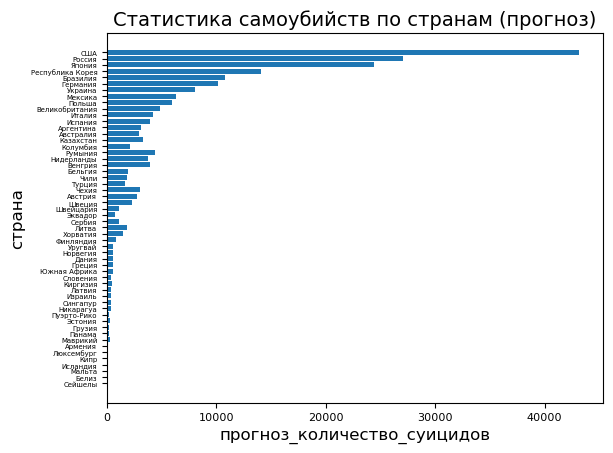

In [109]:
import matplotlib.pyplot as plt
sorted_data = merge_answer1.sort_values(by='количество_самоубийства', ascending=True)
# Задаем данные для диаграммы
countries = sorted_data['страна']
suicides = sorted_data['прогноз_количество_суицидов']

# Создаем график
plt.barh(countries, suicides)

# Настройки осей и заголовка
plt.xlabel('прогноз_количество_суицидов', fontsize=12)  # Устанавливаем размер шрифта
plt.ylabel('страна', fontsize=12)  # Устанавливаем размер шрифта
plt.title('Статистика самоубийств по странам (прогноз)', fontsize=14)  # Устанавливаем размер шрифта заголовка
plt.ticklabel_format(style='plain', axis='x')
# Устанавливаем размер шрифта для текста на диаграмме
plt.xticks(fontsize=8)
plt.yticks(fontsize=5)
# Показываем график
plt.show()


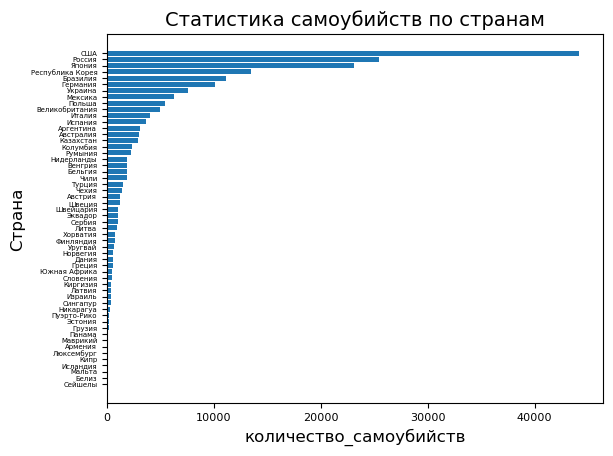

In [110]:
import matplotlib.pyplot as plt
sorted_data = merge_answer1.sort_values(by='количество_самоубийства', ascending=True)
# Задаем данные для диаграммы
countries = sorted_data['страна']
suicides = sorted_data['количество_самоубийства']

# Создаем график
plt.barh(countries, suicides)

# Настройки осей и заголовка
plt.xlabel('количество_самоубийств', fontsize=12)  # Устанавливаем размер шрифта
plt.ylabel('Страна', fontsize=12)  # Устанавливаем размер шрифта
plt.title('Статистика самоубийств по странам', fontsize=14)  # Устанавливаем размер шрифта заголовка

# Устанавливаем размер шрифта для текста на диаграмме
plt.xticks(fontsize=8)
plt.yticks(fontsize=5)
# Показываем график
plt.show()

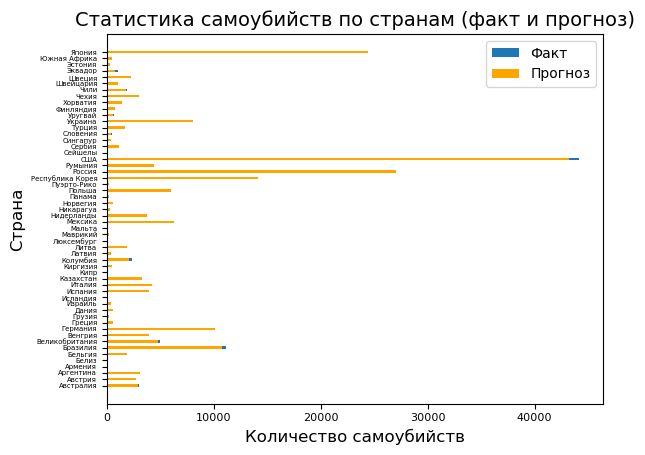

In [114]:
import matplotlib.pyplot as plt

# Сортируем данные по странам в алфавитном порядке
sorted_data = merge_answer1.sort_values(by='страна', ascending=True)

# Задаем данные для диаграммы
countries = sorted_data['страна']
suicides_fact = sorted_data['количество_самоубийства']
suicides_pred = sorted_data['прогноз_количество_суицидов']

# Создаем график
width = 0.4  # Ширина столбцов
fig, ax = plt.subplots()
ax.barh(countries, suicides_fact, width, label='Факт')
ax.barh(countries, suicides_pred, width, label='Прогноз', color='orange')

# Настройки осей и заголовка
plt.xlabel('Количество самоубийств', fontsize=12)
plt.ylabel('Страна', fontsize=12)
plt.title('Статистика самоубийств по странам (факт и прогноз)', fontsize=14)
plt.legend()  # Включаем легенду

# Устанавливаем размер шрифта для текста на диаграмме
plt.xticks(fontsize=8)
plt.yticks(fontsize=5)

# Показываем график
plt.show()

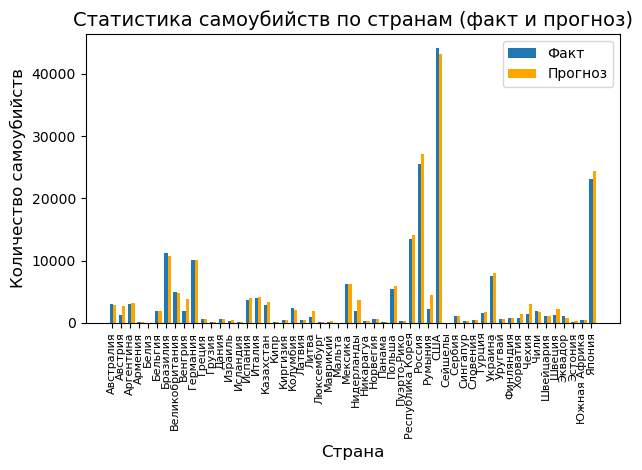

In [115]:
import matplotlib.pyplot as plt

# Сортируем данные по странам в алфавитном порядке
sorted_data = merge_answer1.sort_values(by='страна', ascending=True)

# Задаем данные для диаграммы
countries = sorted_data['страна']
suicides_fact = sorted_data['количество_самоубийства']
suicides_pred = sorted_data['прогноз_количество_суицидов']

# Определяем ширины столбцов
bar_width = 0.35

# Определяем положения столбцов на оси x
bar_positions_fact = range(len(countries))
bar_positions_pred = [x + bar_width for x in bar_positions_fact]

# Создаем столбчатую диаграмму
plt.bar(bar_positions_fact, suicides_fact, width=bar_width, label='Факт')
plt.bar(bar_positions_pred, suicides_pred, width=bar_width, label='Прогноз', color='orange')

# Настройки осей и заголовка
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество самоубийств', fontsize=12)
plt.title('Статистика самоубийств по странам (факт и прогноз)', fontsize=14)
plt.xticks(bar_positions_fact, countries, rotation='vertical', fontsize=8)
plt.legend()

# Показываем график
plt.tight_layout()
plt.show()